In [1]:
import numpy as np
import matplotlib.pyplot as plt

Courant Number: 0.5980000000000001


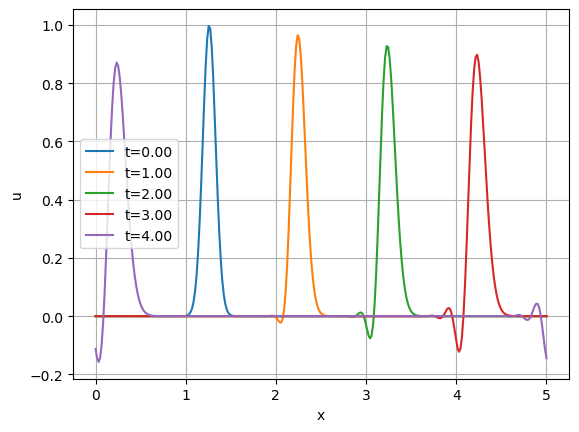

In [2]:
# Parameters
nx = 300  # Number of spatial grid points
L = 5.0  # Length of the domain
a = 1.0  # Advection speed
T = 5.0  # Total simulation time
dt = 0.01  # Time step
dx = L / (nx - 1)  # Spatial resolution
nt = int(T / dt)  # Number of time steps

c = a * dt / dx # Courant Number
print(f"Courant Number: {c}")

# Grid points
x = np.linspace(0, L, nx)

# Initial condition: Gaussian pulse
def initial_condition(x):
    return np.exp(-((x - L / 4) / 0.1) ** 2)

u = initial_condition(x)  # Initialize solution

# Lax-Wendroff Scheme
for n in range(nt):

    # Update solution
    u[1:-1] = (
        u[1:-1] 
        - (a * dt) / (2 * dx) * (u[2:] - u[:-2])  # First-order term
        + (a**2 * dt**2) / (2 * dx**2) * (u[2:] - 2 * u[1:-1] + u[:-2])  # Second-order term
    )
    
    # Periodic boundary conditions
    u[0] = u[-2]  # Update left boundary
    u[-1] = u[1]  # Update right boundary

    # Plot every few steps
    if n % 100 == 0:
        plt.plot(x, u, label=f"t={n*dt:.2f}")

# Plot the final solution
plt.xlabel("x")
plt.ylabel("u")
plt.legend()
plt.grid()
# plt.savefig(f'Plots/lw_1d_cfl_{c: .3f}.png')
plt.show()